In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import scipy as sp
import xrft
import numpy.fft as npft
import dask.array as dsar

Import data

In [2]:
user = os.getcwd().split('/')[2]

if user=='pst019':
    Mediadir= '/media/'+user+'/Backup1/'
 
datadir = Mediadir + 'data/ERA5_Clim/ERA5_data/'
year= 2013
month= 1

filedir= datadir + f'levels_500_era5_{year}_'+str(month).zfill(2)+'.nc'

ds= xr.open_dataset(filedir)
ds['plev']= ds['plev']/100


a longitudinal plot

Mean: -0.3508918


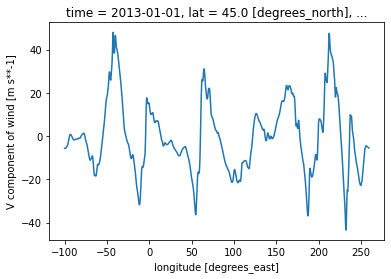

In [27]:
var= 'v'
plev= 500
lat= 45
time= 0

ds1= ds[var].sel(plev= plev, lat= lat).isel(time= 0)

ds1.plot()
print('Mean:', ds1.mean().values)

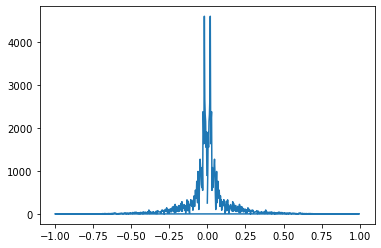

In [28]:
from scipy import fftpack
fft = fftpack.fft(ds1.values)
n= len(ds1.values)
lonstep = 0.5 #longitude resolution
freqs= fftpack.fftfreq(len(ds1.values), d= lonstep)

plt.plot(freqs, np.abs(fft))

This is symmetric, so cut away half

In [32]:
2/n *np.real(fft[0])

-0.7017835828993055

This is double the mean, indicating that the xrft real amplitude is working

In [13]:
freqs= freqs[1:n//2]
fft= fft[1:n//2]

Text(0.5, 0, 'Wavenumber')

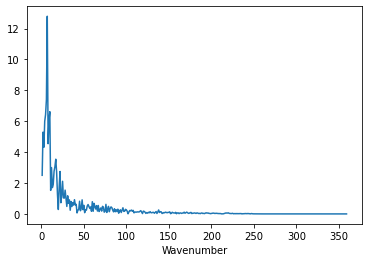

In [23]:
plt.plot(freqs*360, 2/n* np.abs(fft))
plt.xlabel('Wavenumber')

Text(0.5, 0, 'Wavelength [degree]')

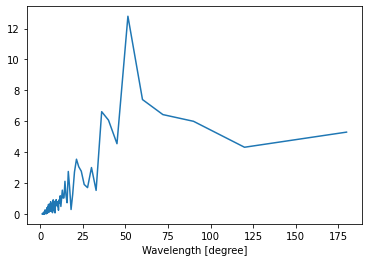

In [21]:
plt.plot(1/freqs[1:n//2], 2/n* np.abs(fft)[1:n//2])
plt.xlabel('Wavelength [degree]')

Text(0.5, 0, 'Wavelength [degree]')

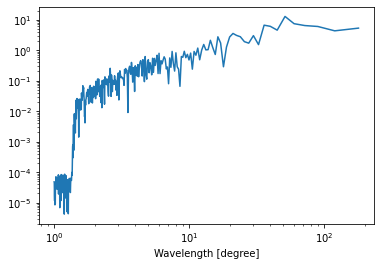

In [22]:
plt.loglog(1/freqs[1:n//2], 2/n* np.abs(fft)[1:n//2])
plt.xlabel('Wavelength [degree]')

# Now repoduce everything with xrft 

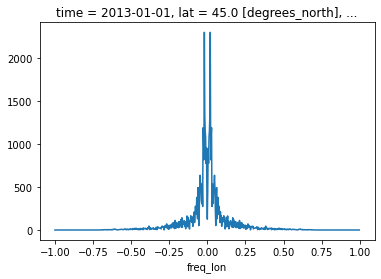

In [71]:
fds1 = xrft.fft(ds1, true_phase=True, true_amplitude=True)
fds1= np.abs(fds1)
fds1.plot()
n= len(fds1.freq_lon)

This is the same as with scipy if true_amplitude= False

Text(0.5, 0, 'Wavenumber')

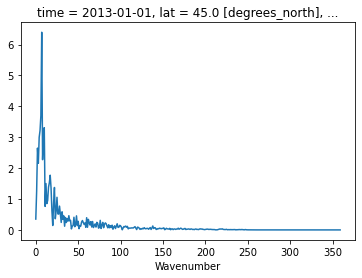

In [72]:
fds1= fds1.isel(freq_lon= np.arange(n//2, n) ) #to cut the spectrum in 2
fds1['freq_lon'] = 360* fds1['freq_lon']
fds1*= 2/n

fds1.plot()
plt.xlabel('Wavenumber')

Text(0.5, 0, 'Wavenumber')

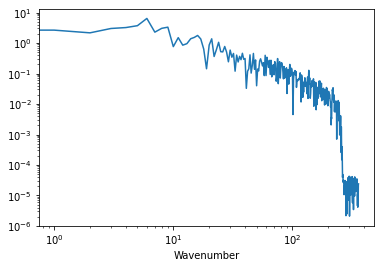

In [79]:
#plt.plot(fds1[1:])
#plt.xscale('log')
plt.loglog(fds1[1:])
plt.xlabel('Wavenumber')

Text(0.5, 0, 'Wavenumber')

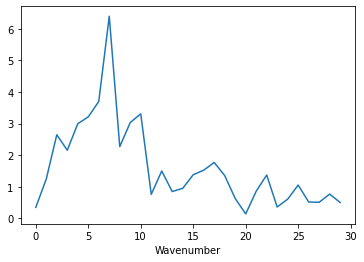

In [77]:
plt.plot(fds1[:30])
plt.xlabel('Wavenumber')

The powerspectrum appears not to work

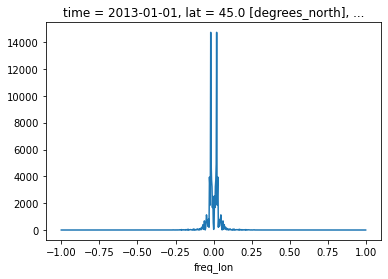

In [33]:
fds1= xrft.power_spectrum(ds1)#,true_phase=True, true_amplitude=True)
fds1.plot()